1. Tujuan dari EDA ini adalah untuk menganalisa faktor-faktor yang mempengaruhi penjualan produk
2. Goals dari analisis data ini adalah untuk mengetahui faktor apa yang berpengaruh dalam pemilihan produk oleh customer

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

Import dataset

In [5]:
cust_review = pd.read_csv('cust_review.csv')

Top 5 of dataset

In [7]:
cust_review.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Info dari dataset

In [8]:
cust_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Keluarin NaN dari dataset agar data lebih mudah di analisis

In [9]:
cust_review = cust_review.dropna()

In [11]:
cust_review.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


Mereset ulang susunan index setelah NaN di drop

In [12]:
cust_review.reset_index(drop=True)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...,...
19657,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
19658,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
19659,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
19660,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [13]:
cust_review.shape

(19662, 11)

Rangkuman statistik dari dataset

In [14]:
cust_review.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,11755.260655,921.297274,43.260808,4.183145,0.818177,2.652477
std,6772.063092,200.227528,12.258122,1.112224,0.385708,5.834285
min,2.000000,1.000000,18.000000,1.000000,0.000000,0.000000
25%,5888.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11749.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17624.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


Mengurutkan susunan data berdasarkan rating

In [15]:
cust_review_sort = cust_review.sort_values(by = 'Rating',ascending=False).head()
cust_review_sort.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses
9630,9630,868,29,"Perfect, elegant & complimentary",Love this shirt. i am actually pregnant and th...,5,1,0,General,Tops,Knits
9632,9632,868,37,Flattering tunic for any occasion,"Love this top. it's very comfortable, and fla...",5,1,0,General,Tops,Knits
17883,17883,861,32,Cute t shirt,"Love this t-shirt, its comfortable and very cu...",5,1,3,General,Tops,Knits
9634,9634,820,49,Love the details,This top is really pretty. i love the details ...,5,1,4,General,Tops,Blouses


In [16]:
cust_review.columns = cust_review.columns.str.replace(' ','')

Histogram dari nilai angka continuous

(array([1.8768e+04, 6.5000e+02, 1.5100e+02, 4.7000e+01, 2.0000e+01,
        9.0000e+00, 8.0000e+00, 5.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <a list of 10 Patch objects>)

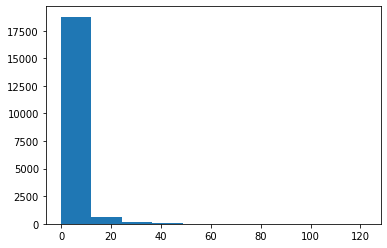

In [104]:
plt.hist(cust_review['PositiveFeedbackCount'])

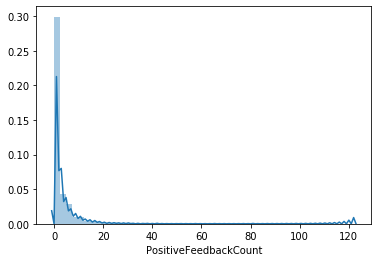

In [105]:
sns.distplot(cust_review['PositiveFeedbackCount'])

(array([ 3575.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16087.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

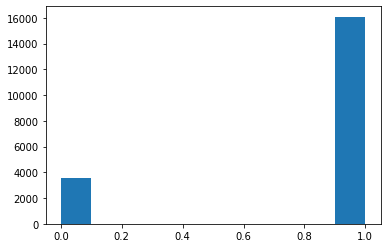

In [106]:
plt.hist(cust_review['RecommendedIND'])

Menghitung dari kategori Class Name - cross tabulate

In [27]:
class_dist = cust_review.groupby('ClassName').size()
class_dist

ClassName
Blouses           2587
Casual bottoms       1
Chemises             1
Dresses           5371
Fine gauge         927
Intimates          120
Jackets            598
Jeans              970
Knits             3981
Layering           115
Legwear            131
Lounge             574
Outerwear          281
Pants             1157
Shorts             260
Skirts             796
Sleep              174
Sweaters          1218
Swim               293
Trend              107
dtype: int64

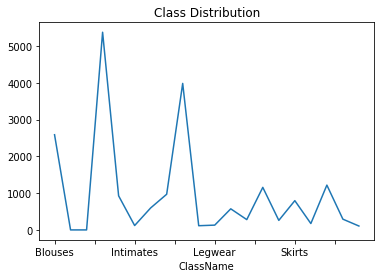

In [28]:
class_dist.plot(title='Class Distribution')

Melihat seluruh data angka

In [29]:
cust_review_num = cust_review.select_dtypes(include=['float64','int64'])
cust_review_num.head()

,Unnamed:0,ClothingID,Age,Rating,RecommendedIND,PositiveFeedbackCount
2,2,1077,60,3,0,0
3,3,1049,50,5,1,0
4,4,847,47,5,1,6
5,5,1080,49,2,0,4
6,6,858,39,5,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001729FD28548>,
      dtype=object)

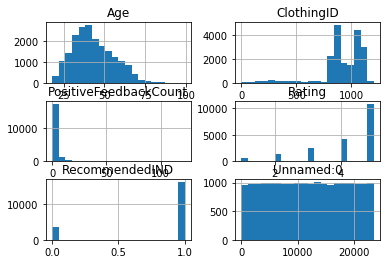

In [30]:
cust_review_num.hist(bins=20)

In [31]:
cust_review_corr = cust_review_num.corr()['Rating'][:-1]
cust_review_corr

Unnamed:0        -0.005491
ClothingID       -0.013529
Age               0.034910
Rating            1.000000
RecommendedIND    0.793145
Name: Rating, dtype: float64

Korelasi plot menggunakan 'pairplot'

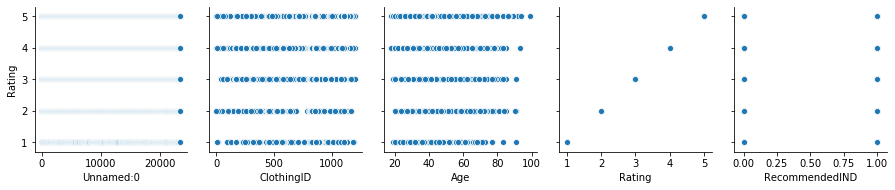

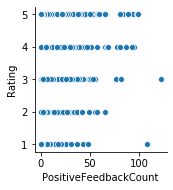

In [32]:
for i in range(0, len(cust_review_num.columns),5):
    sns.pairplot(cust_review_num, y_vars=['Rating'],x_vars=cust_review_num.columns[i:i+5])

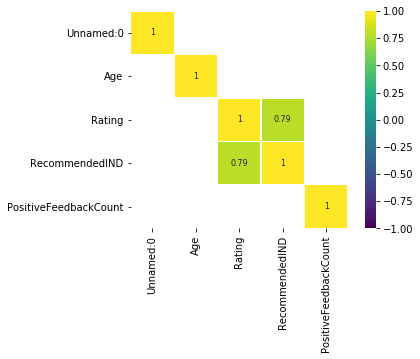

In [90]:
corr = cust_review_num.drop('ClothingID', axis=1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
        cmap='viridis', vmax=1.0, vmin=-1.0, linewidth=0.1,
        annot=True, annot_kws={"size":8}, square=True);

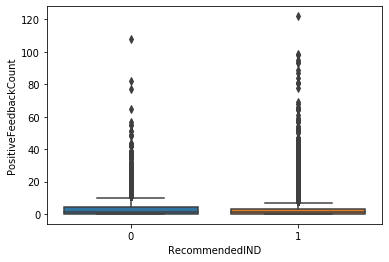

In [103]:
box1 = sns.boxplot(x='RecommendedIND', y='PositiveFeedbackCount', data=cust_review)

Plot regresi

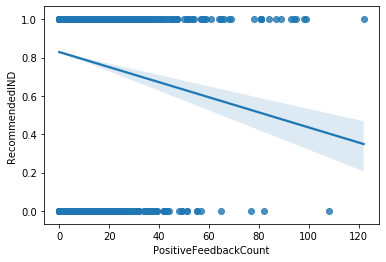

In [102]:
sns.regplot(cust_review['PositiveFeedbackCount'], cust_review['RecommendedIND'])

In [97]:
y = cust_review['RecommendedIND']
x1 = cust_review['PositiveFeedbackCount']

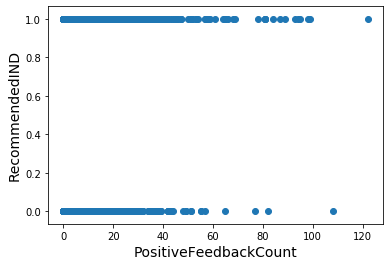

In [132]:
plt.scatter(x1,y, color='C0')
plt.xlabel('PositiveFeedbackCount', fontsize = 14)
plt.ylabel('RecommendedIND', fontsize = 14)
plt.show()

In [100]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         RecommendedIND   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.74
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           7.22e-17
Time:                        12:45:27   Log-Likelihood:                -9132.4
No. Observations:               19662   AIC:                         1.827e+04
Df Residuals:                   19660   BIC:                         1.828e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.8286      0.003    274.700      0.000       0.823       0.835
PositiveFeedbackCount    -0.0039      0.000     -8.351      0.000      -0.005      -0.003
==============================================================================
Omnibus:                     4824.864   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9254.529
Skew:                          -1.641   Prob(JB):                         0.00
Kurtosis:                       3.722   Cond. No.                         7.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

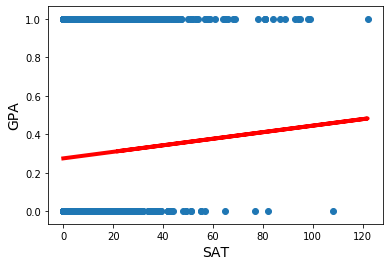

In [101]:
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275 # -> The value of SAT coef and const coef
fig = plt.plot(x1,yhat, lw=4, c='red', label='regression line')
plt.xlabel('SAT',fontsize=14)
plt.ylabel('GPA',fontsize=14)
plt.show()

Dari hasil analisis didapat kesimpulan bahwa Feedback yang positif dari customer berpengaruh positif terhadap pemilihan rekomendasi customer yang memilih produk tersebut

Text(0, 0.5, 'Age')

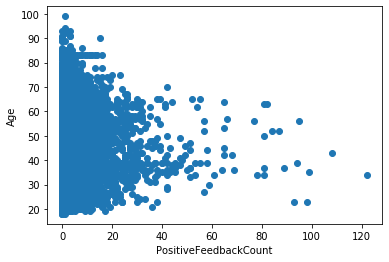

In [131]:
plt.scatter(cust_review['PositiveFeedbackCount'],cust_review['Age'])
plt.xlabel('PositiveFeedbackCount')
plt.ylabel('Age')

Insight yang lain juga dapat dilihat bahwa rata-rata customer yang memberikan Feedback yang positif berasal dari umur 0-20 Tahun

In [139]:
cust_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed:0              19662 non-null  int64 
 1   ClothingID             19662 non-null  int64 
 2   Age                    19662 non-null  int64 
 3   Title                  19662 non-null  object
 4   ReviewText             19662 non-null  object
 5   Rating                 19662 non-null  int64 
 6   RecommendedIND         19662 non-null  int64 
 7   PositiveFeedbackCount  19662 non-null  int64 
 8   DivisionName           19662 non-null  object
 9   DepartmentName         19662 non-null  object
 10  ClassName              19662 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.4+ MB


Splitting Data

In [141]:
cust_review.drop(columns=['Unnamed:0', 'ClothingID', 'Title', 'ReviewText','DivisionName','DepartmentName','ClassName'], inplace=True)

In [142]:
from sklearn.model_selection import train_test_split

In [144]:
X = cust_review.drop(columns='RecommendedIND')
y = cust_review['RecommendedIND']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, random_state = 42)

In [145]:
X_train.head()

,Age,Rating,PositiveFeedbackCount
12418,56,5,0
11156,37,5,21
15623,44,2,0
17299,68,4,1
1059,57,5,6


Machine Learning Modelling

In [146]:
model = LinearRegression()

In [147]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
pred = model.predict(X_test)

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [150]:
MAE = mean_absolute_error(y_test, pred)

In [151]:
MSE = mean_squared_error(y_test, pred)

In [152]:
RMSE = np.sqrt(MSE)

In [153]:
R2 = r2_score(y_test, pred)

In [154]:
print("Hasil Evaluation Matrix : ")
print("MAE : ", MAE)
print("MSE : ", MSE)
print("RMSE : ", RMSE)
print("R2 : ", R2)

Hasil Evaluation Matrix : 
MAE :  0.15262971874887285
MSE :  0.04989984006132248
RMSE :  0.22338272104467366
R2 :  0.6589301722900773


Optimasi Model

In [155]:
df_analysis = X_train.copy()

In [156]:
pred_train = model.predict(X_train)

In [157]:
r2_score(y_train, pred_train)

0.6220830592601081

In [158]:
df_analysis['target'] = y_train

In [159]:
df_analysis.head()

,Age,Rating,PositiveFeedbackCount,target
12418,56,5,0,1
11156,37,5,21,1
15623,44,2,0,0
17299,68,4,1,1
1059,57,5,6,1


In [160]:
df_analysis['prediksi'] = pred_train

In [161]:
df_analysis.head()

,Age,Rating,PositiveFeedbackCount,target,prediksi
12418,56,5,0,1,1.047409
11156,37,5,21,1,1.022682
15623,44,2,0,0,0.222956
17299,68,4,1,1,0.773869
1059,57,5,6,1,1.041278


In [162]:
df_analysis['error'] = abs(df_analysis['target'] - df_analysis['prediksi'])

In [163]:
df_analysis.sort_values(by='error', ascending=False).head(10)

,Age,Rating,PositiveFeedbackCount,target,prediksi,error
22632,34,1,7,1,-0.060056,1.060056
10517,44,1,0,1,-0.051281,1.051281
7740,44,1,0,1,-0.051281,1.051281
9161,82,5,0,0,1.051186,1.051186
13607,48,1,0,1,-0.050700,1.050700
6216,53,1,0,1,-0.049974,1.049974
21673,67,5,0,0,1.049007,1.049007
16377,67,5,0,0,1.049007,1.049007
5570,69,1,0,1,-0.047650,1.047650
12032,56,5,0,0,1.047409,1.047409


In [165]:
df_analysis[df_analysis['PositiveFeedbackCount'] < 1].count()

Age                      7063
Rating                   7063
PositiveFeedbackCount    7063
target                   7063
prediksi                 7063
error                    7063
dtype: int64

Feature Engineering & Polynomial

In [172]:
df_clean = cust_review.copy()

In [177]:
df_clean = df_clean[(df_clean['RecommendedIND'] > 0)]

In [179]:
df_clean.head()

,Age,Rating,RecommendedIND,PositiveFeedbackCount
4,47,5,1,6
6,39,5,1,1
7,39,4,1,4
12,53,5,1,2
14,50,3,1,1


In [182]:
X = df_clean.drop(columns='RecommendedIND')
y = df_clean['RecommendedIND']

In [183]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler

In [184]:
poli = PolynomialFeatures(degree=4, include_bias = False)

In [185]:
X_poli = poli.fit_transform(X)

In [186]:
X_poli_4 = pd.DataFrame(X_poli)

In [190]:
X_poli_4.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,47.0,5.0,6.0,2209.0,235.0,282.0,25.0,30.0,36.0,103823.0,...,79524.0,5875.0,7050.0,8460.0,10152.0,625.0,750.0,900.0,1080.0,1296.0
1,39.0,5.0,1.0,1521.0,195.0,39.0,25.0,5.0,1.0,59319.0,...,1521.0,4875.0,975.0,195.0,39.0,625.0,125.0,25.0,5.0,1.0
2,39.0,4.0,4.0,1521.0,156.0,156.0,16.0,16.0,16.0,59319.0,...,24336.0,2496.0,2496.0,2496.0,2496.0,256.0,256.0,256.0,256.0,256.0
3,53.0,5.0,2.0,2809.0,265.0,106.0,25.0,10.0,4.0,148877.0,...,11236.0,6625.0,2650.0,1060.0,424.0,625.0,250.0,100.0,40.0,16.0
4,50.0,3.0,1.0,2500.0,150.0,50.0,9.0,3.0,1.0,125000.0,...,2500.0,1350.0,450.0,150.0,50.0,81.0,27.0,9.0,3.0,1.0


Splitting Data

In [200]:
X = X_poli_4
y = df_clean['PositiveFeedbackCount']

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [202]:
model_poli = LinearRegression()

In [203]:
model_poli.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [204]:
pred_poli = model_poli.predict(X_test)

In [205]:
MAE_poli = mean_absolute_error(y_test, pred_poli)
MSE_poli = mean_squared_error(y_test, pred_poli)
RMSE_poli = np.sqrt(MSE_poli)
R2_poli = r2_score(y_test, pred_poli)

In [206]:
print("Hasil Evaluation Matrix : ")
print("MAE : ", MAE_poli)
print("MSE : ", MSE_poli)
print("RMSE : ", RMSE_poli)
print("R2 : ", R2_poli)

Hasil Evaluation Matrix : 
MAE :  4.4422227898076895e-10
MSE :  7.386175487168979e-19
RMSE :  8.594286175808308e-10
R2 :  1.0


Scalling Data

In [207]:
scaling = RobustScaler()

In [208]:
X_scaled = scaling.fit_transform(X)

In [217]:
X = X_scaled
y = df_clean['PositiveFeedbackCount']

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [219]:
model_scaled = LinearRegression()

In [220]:
model_scaled.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
pred_scaled = model_scaled.predict(X_test)

In [222]:
MAE_scaled = mean_absolute_error(y_test, pred_scaled)
MSE_scaled = mean_squared_error(y_test, pred_scaled)
RMSE_scaled = np.sqrt(MSE_scaled)
R2_scaled = r2_score(y_test, pred_scaled)

In [223]:
print("Hasil Evaluation Matrix : ")
print("MAE : ", MAE_scaled)
print("MSE : ", MSE_scaled)
print("RMSE : ", RMSE_scaled)
print("R2 : ", R2_scaled)

Hasil Evaluation Matrix : 
MAE :  1.0301811234325964e-11
MSE :  5.614552058807858e-22
RMSE :  2.36950460198073e-11
R2 :  1.0
